In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from BASIC_spatial_pooler import SpatialPooler

In [2]:
digits = load_digits()

In [3]:
# We see that we have 1797 images, each 8x8=64 pixels
print("Image data shape", digits.data.shape)

# And we see we have the right number of labels (integers from 0-9)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


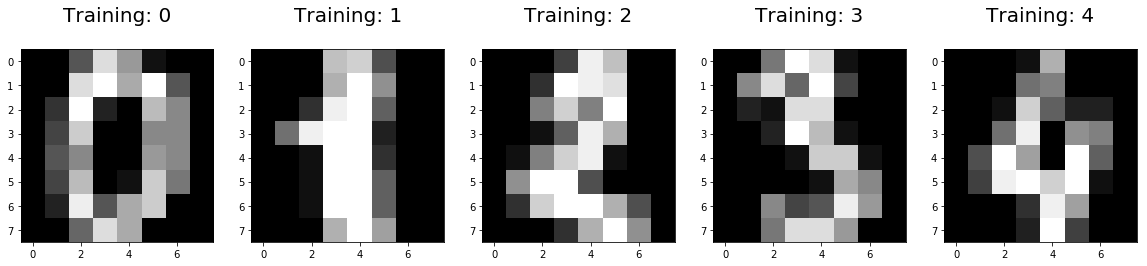

In [4]:
# Show a few training images
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(numpy.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [5]:
type(digits)
binary_digits = load_digits()
type(binary_digits)

sklearn.utils.Bunch

In [6]:
binary_digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
# Create a spatial pooler object
inputDimensions = (8,8)
columnDimensions = (16,16)
potentialRadius = 3
potentialPct = 0.5
sparsity = 0.03
stimulusThreshold = 2
synPermInactiveDec = 0.008 #0.008
synPermActiveInc = 0.05 #0.05
synConnectedPermThreshold = 0.1
minPctActiveDutyCycles=0.01
dutyCyclePeriod=20
boostStrength=3.0
learn=True
seed=12345
debug=False
sp = SpatialPooler(inputDimensions, columnDimensions, potentialRadius, potentialPct, sparsity, stimulusThreshold, synPermInactiveDec, synPermActiveInc, synConnectedPermThreshold, minPctActiveDutyCycles, dutyCyclePeriod, boostStrength, learn, seed, debug)

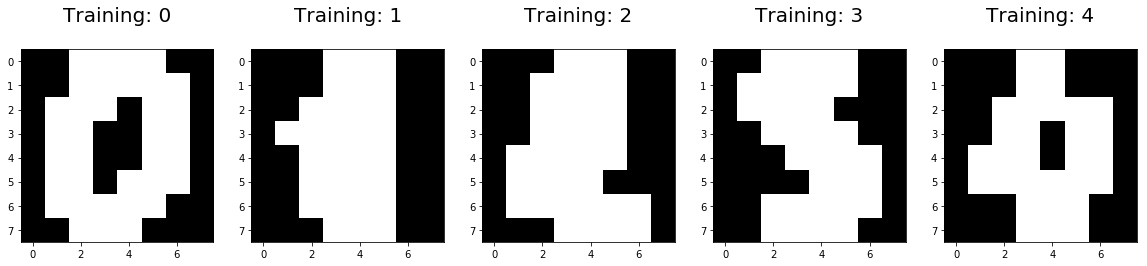

In [8]:
# Now, let's threshold the data
threshold = 12
#binary_digits = numpy.copy(digits)
binary_digits.data[digits.data < threshold] = 0.0
binary_digits.data[digits.data > 0.0] = 1.0

# Show the same training images after thresholding
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(binary_digits.data[0:5], binary_digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(numpy.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)


In [9]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(binary_digits.data, binary_digits.target, test_size=0.25, random_state=0)

In [10]:
# train the spatial pooler on the training data

In [11]:
type(x_train)
x_train.shape
num_training_images = 1347

x_train[0].shape
for image in x_train:
    sp.compute(image.reshape((8,8)))

In [12]:
# now turn off learning for spatial pooler and generate a
# new dataset of spatial pooler representations for the 
# classifier to learn from (still over training data)
sp._learn = False

SDR_train = numpy.zeros((1347,256))
index = 0
for image in x_train:
    sp.compute(image.reshape((8,8)))
    SDR = sp._columnActivations
    SDR_train[index] = SDR.reshape(-1)
    index = index + 1

In [13]:
# Now repeat to create testing dataset
x_test.shape # (450, 64)

SDR_test = numpy.zeros((450,256))
index = 0
for image in x_test:
    sp.compute(image.reshape((8,8)))
    SDR = sp._columnActivations
    SDR_test[index] = SDR.reshape(-1)
    index = index + 1

In [14]:
# import scikit learn logistic regression ML model
from sklearn.linear_model import LogisticRegression

In [15]:
# Create a model instance
LRmodel = LogisticRegression()

# train model and store information learned
# x is digit images and y is labels
#LRmodel.fit(x_train, y_train)
LRmodel.fit(SDR_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# predict labels for first test image
#LRmodel.predict(x_test[0].reshape(1,-1))
LRmodel.predict(SDR_test[0].reshape(1,-1))

array([4])

In [17]:
# get all test predictions
predictions = LRmodel.predict(SDR_test)

In [18]:
# compute accuracy
score = LRmodel.score(SDR_test, y_test)
print(score)

0.08444444444444445


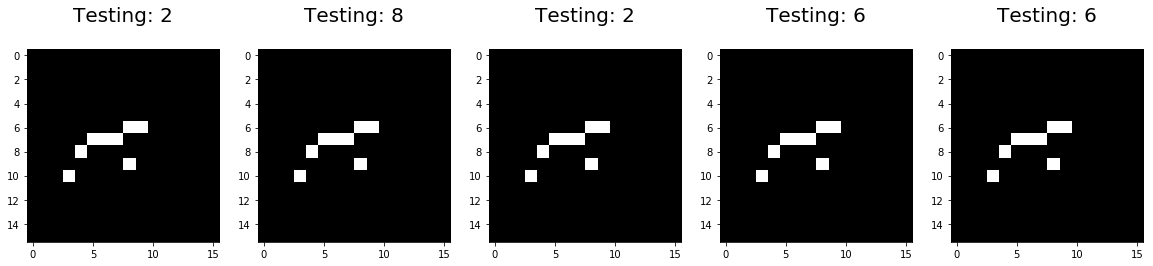

In [19]:
# Are SDR's actually changing?
# Show the same training images after thresholding
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(SDR_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(numpy.reshape(image, (16,16)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize=20)


In [20]:
# check first two test cases
#SDR1 = SDR_test[0]
#SDR2 = SDR_test[1]

#print(numpy.argwhere(SDR1 > 0))
#print(numpy.argwhere(SDR2 > 0))

In [21]:
#sp._boostFactors
#sp._activeDutyCycles

In [22]:
sp._columnActivations

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
sp._permanences

array([[0.082, 0.082, 0.082, ..., 0.   , 0.   , 0.   ],
       [0.062, 0.062, 0.062, ..., 0.   , 0.   , 0.   ],
       [0.092, 0.092, 0.092, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.092, 0.092, 0.092],
       [0.   , 0.   , 0.   , ..., 0.092, 0.092, 0.092],
       [0.   , 0.   , 0.   , ..., 0.072, 0.072, 0.072]])

In [24]:
len(numpy.argwhere(sp._permanences.reshape(-1) > 0.00))
#len(sp._permanences.reshape(-1)) # 16384

8604

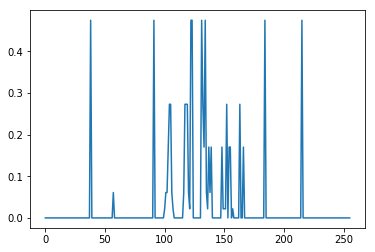

In [25]:
# visualize active duty cycles
plt.plot(numpy.array(list(range(sp._numColumns))), sp._activeDutyCycles)

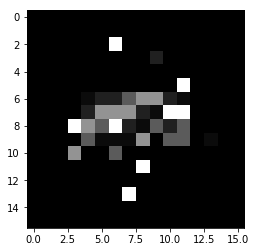

In [26]:
plt.imshow(numpy.reshape(sp._activeDutyCycles, (16,16)), cmap=plt.cm.gray)

In [27]:
# Look at confusion matrix
import sklearn.metrics
#predictions.shape
CM = sklearn.metrics.confusion_matrix(y_test, predictions)
print(CM)

[[ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]]


In [28]:
sp._permanences

array([[0.082, 0.082, 0.082, ..., 0.   , 0.   , 0.   ],
       [0.062, 0.062, 0.062, ..., 0.   , 0.   , 0.   ],
       [0.092, 0.092, 0.092, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.092, 0.092, 0.092],
       [0.   , 0.   , 0.   , ..., 0.092, 0.092, 0.092],
       [0.   , 0.   , 0.   , ..., 0.072, 0.072, 0.072]])